### E01 vs ng1 vs ng2

In [5]:
from nmon import *

In [6]:
EC_shunt = 0.18

EJN_EC = 0.1
EJM_EC = 10



N_ng1 = 30
N_ng2 = 30
N_flux = 5

ng1_list = np.linspace(0, 1, N_ng1)
ng2_list = np.linspace(0, 1, N_ng2)
flux_list = np.linspace(0, 0.5, N_flux)

nmon = Nmon(N=1, M=2, EJN=EJN_EC*EC_shunt, EJM=EJM_EC*EC_shunt, EC_shunt=EC_shunt)

In [7]:


w01_list = np.full([N_ng1, N_ng2, N_flux], None, dtype=float)
w12_list = np.full([N_ng1, N_ng2, N_flux], None, dtype=float)
E0_list = np.full([N_ng1, N_ng2, N_flux], None, dtype=float)
E1_list = np.full([N_ng1, N_ng2, N_flux], None, dtype=float)
E2_list = np.full([N_ng1, N_ng2, N_flux], None, dtype=float)
relative_anharm_list = np.full([N_ng1, N_ng2, N_flux], None, dtype=float)

for i, ng1 in enumerate(tqdm(ng1_list)):
    for j, ng2 in enumerate(ng2_list):
        for k, flux in enumerate(flux_list):
            try:
                nmon.hamiltonian_calc(flux=flux, ng=[ng1, ng2], num_levels=6, make_plot=False, just_H=False, 
                                    cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))
                w01_list[i, j, k] = nmon.transition_freqs[0]
                E0_list[i, j, k] = nmon.bound_state_energies[0]
                E1_list[i, j, k] = nmon.bound_state_energies[1]

                if len(nmon.transition_freqs) > 1:
                    w12_list[i, j, k] = nmon.transition_freqs[1]
                    E2_list[i, j, k] = nmon.bound_state_energies[2]
                    relative_anharm_list[i, j, k] = nmon.relative_anharm

            except Exception as e:
                print(e)
                continue

format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w01_list.npy".format(*format_list), w01_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w12_list.npy".format(*format_list), w12_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E0_list.npy".format(*format_list), E0_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E1_list.npy".format(*format_list), E1_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E2_list.npy".format(*format_list), E2_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_relative_anharm_list.npy".format(*format_list), relative_anharm_list)

100%|██████████| 30/30 [08:25<00:00, 16.86s/it]


In [8]:
format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))
w01_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w01_list.npy".format(*format_list))
w12_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w12_list.npy".format(*format_list))
E0_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E0_list.npy".format(*format_list))
E1_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E1_list.npy".format(*format_list))
E2_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E2_list.npy".format(*format_list))
relative_anharm_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_relative_anharm_list.npy".format(*format_list))

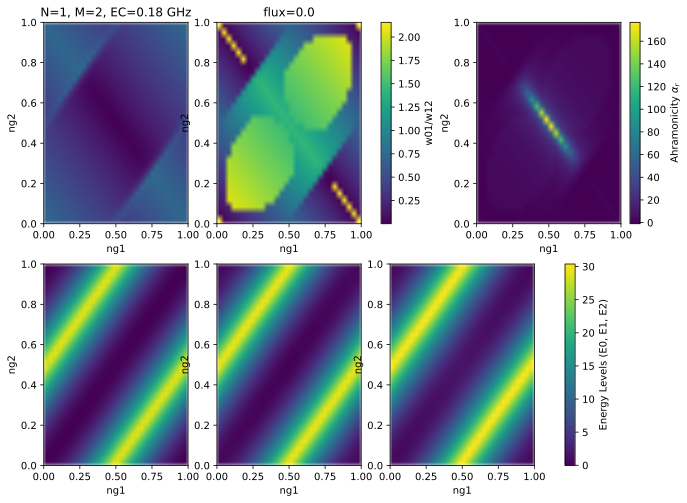

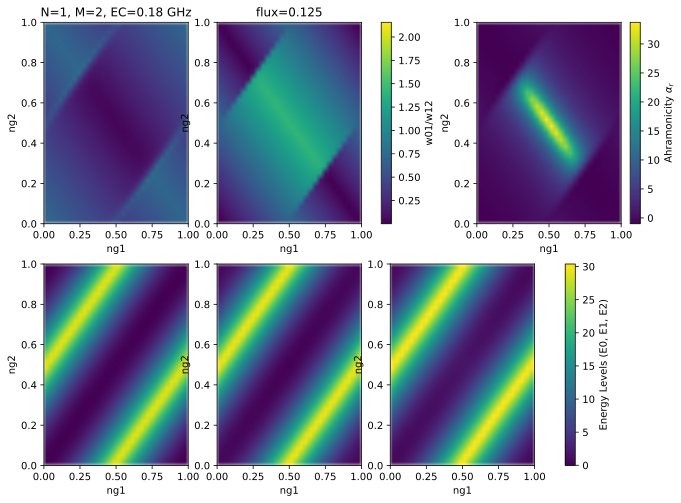

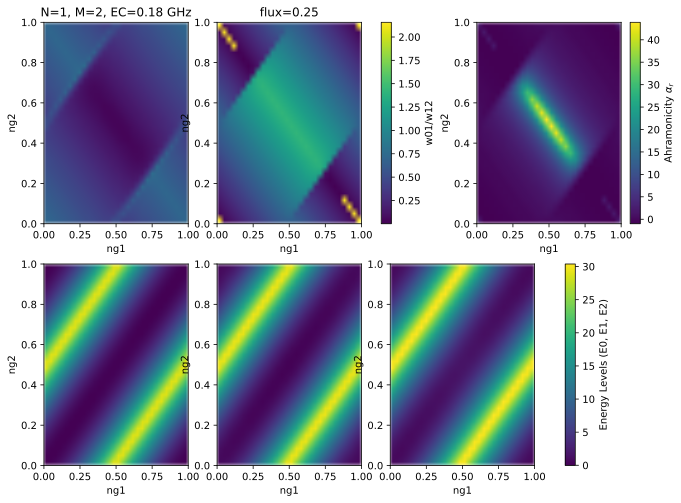

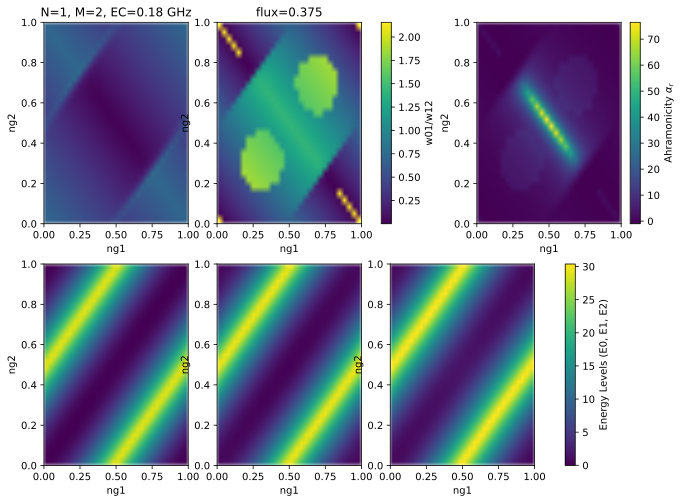

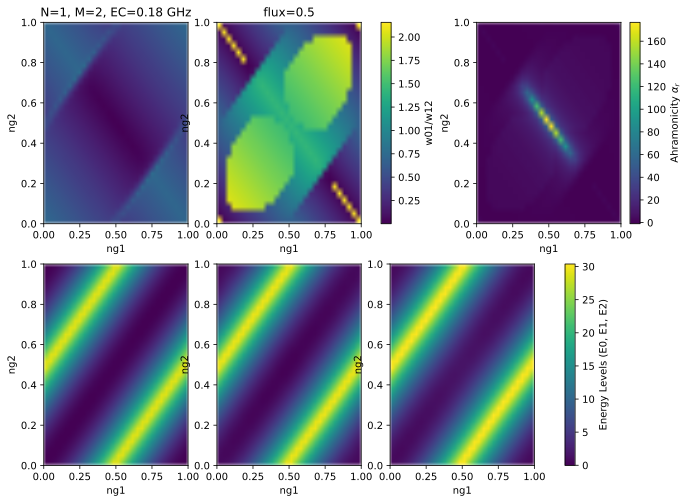

In [9]:
import numpy as np
import matplotlib.pyplot as plt

ng1_grid, ng2_grid = np.meshgrid(ng1_list, ng2_list)

for k, flux_value in enumerate(flux_list[:]):
    # Plot with imshow and overlay star-points
    fig, axes = plt.subplots(2, 3, figsize=(11, 8))

    axes[0, 0].set_title("N={}, M={}, EC={} GHz".format(nmon.N, nmon.M, round(nmon.EC_shunt, 2)))
    axes[0, 1].set_title("flux={}".format(flux_value))

    # Define shared vmin and vmax for [0,0] and [0,1]
    w01_min, w01_max = w01_list.min(), w01_list.max()
    w12_min, w12_max = w12_list.min(), w12_list.max()
    shared_min, shared_max = min(w01_min, w12_min), max(w01_max, w12_max)

    # Plot [0,0] and [0,1] with shared colorbar
    im1 = axes[0, 0].imshow(w01_list[:, :, k], origin='lower', aspect='auto',
                             extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                             cmap='viridis', interpolation='none', vmin=shared_min, vmax=shared_max)
    axes[0, 0].set_xlabel('ng1')
    axes[0, 0].set_ylabel('ng2')

    im2 = axes[0, 1].imshow(w12_list[:, :, k], origin='lower', aspect='auto',
                             extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                             cmap='viridis', interpolation='none', vmin=shared_min, vmax=shared_max)
    axes[0, 1].set_xlabel('ng1')
    axes[0, 1].set_ylabel('ng2')

    # Add a shared colorbar for [0,0] and [0,1]
    cbar = fig.colorbar(im1, ax=[axes[0, 0], axes[0, 1]], label='w01/w12')

    
                # Using imshow for pixel plot
    im1 = axes[0,2].imshow(relative_anharm_list[:,:,k], origin='lower', aspect='auto',
        extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                                cmap='viridis', interpolation='none')
    fig.colorbar(im1, ax=axes[0, 2], label=r'Ahramonicity $\alpha_r$')
    axes[0,2].set_xlabel('ng1')
    axes[0,2].set_ylabel('ng2')

    # Define shared vmin and vmax for [1,0], [1,1], [1,2]
    e_min, e_max = min(E0_list.min(), E1_list.min(), E2_list.min()), max(E0_list.max(), E1_list.max(), E2_list.max())

    # Plot [1,0], [1,1], [1,2] with shared colorbar
    im3 = axes[1, 0].imshow(E0_list[:, :, k], origin='lower', aspect='auto',
                             extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                             cmap='viridis', interpolation='none', vmin=e_min, vmax=e_max)
    axes[1, 0].set_xlabel('ng1')
    axes[1, 0].set_ylabel('ng2')

    im4 = axes[1, 1].imshow(E1_list[:, :, k], origin='lower', aspect='auto',
                             extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                             cmap='viridis', interpolation='none', vmin=e_min, vmax=e_max)
    axes[1, 1].set_xlabel('ng1')
    axes[1, 1].set_ylabel('ng2')

    im5 = axes[1, 2].imshow(E2_list[:, :, k], origin='lower', aspect='auto',
                             extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                             cmap='viridis', interpolation='none', vmin=e_min, vmax=e_max)
    axes[1, 2].set_xlabel('ng1')
    axes[1, 2].set_ylabel('ng2')

    # Add a shared colorbar for [1,0], [1,1], [1,2]
    cbar = fig.colorbar(im3, ax=[axes[1, 0], axes[1, 1], axes[1, 2]], label='Energy Levels (E0, E1, E2)')

# Save and display the plot
plt.savefig("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.pdf".format(nmon.N, nmon.M, round(nmon.EC_shunt, 2)))
plt.show()


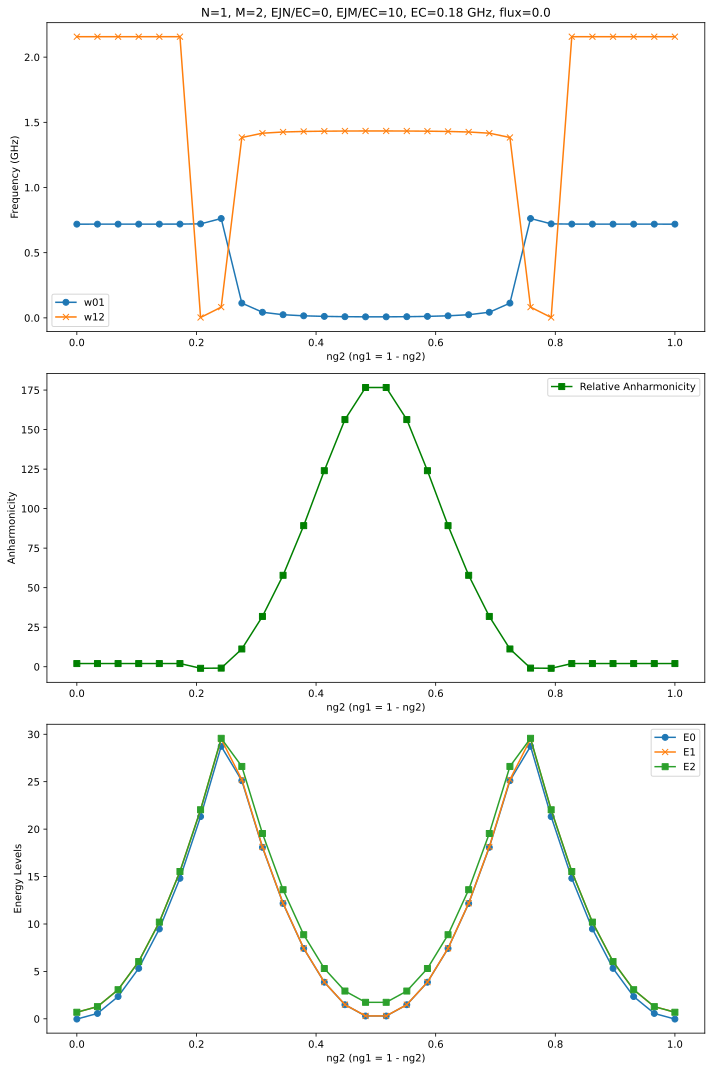

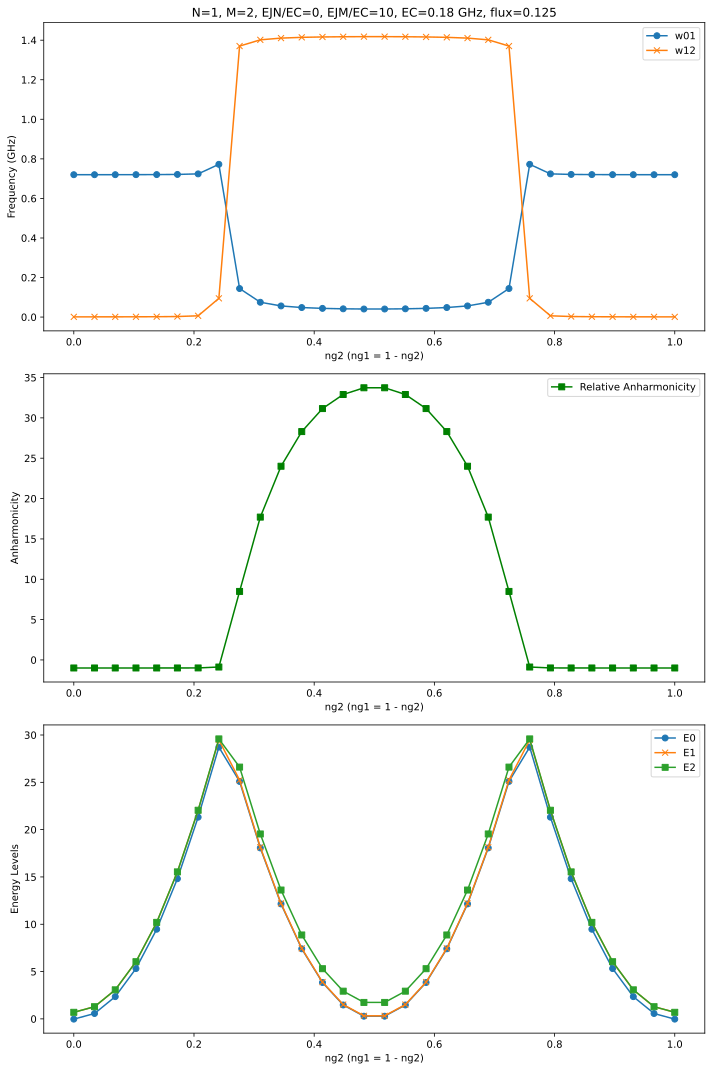

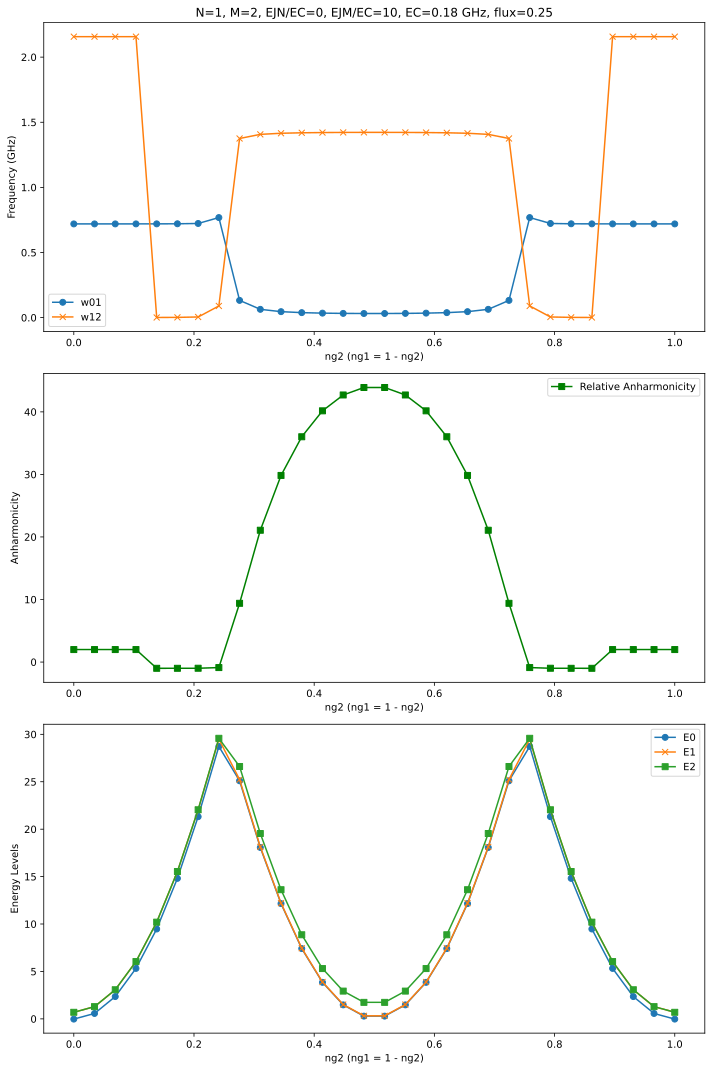

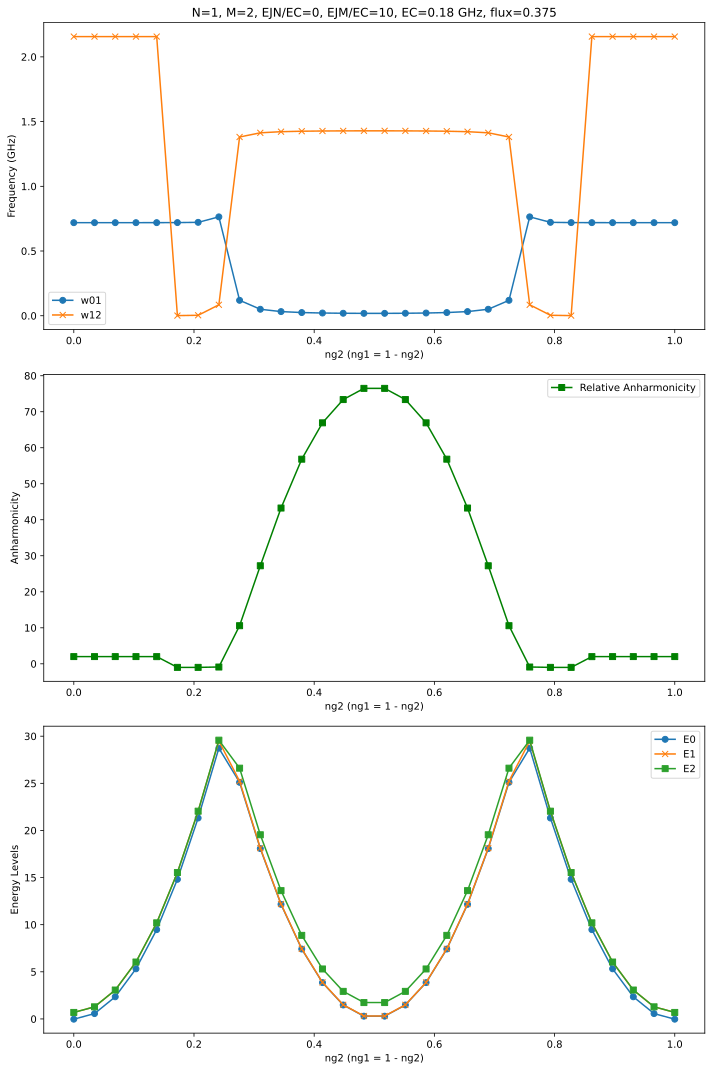

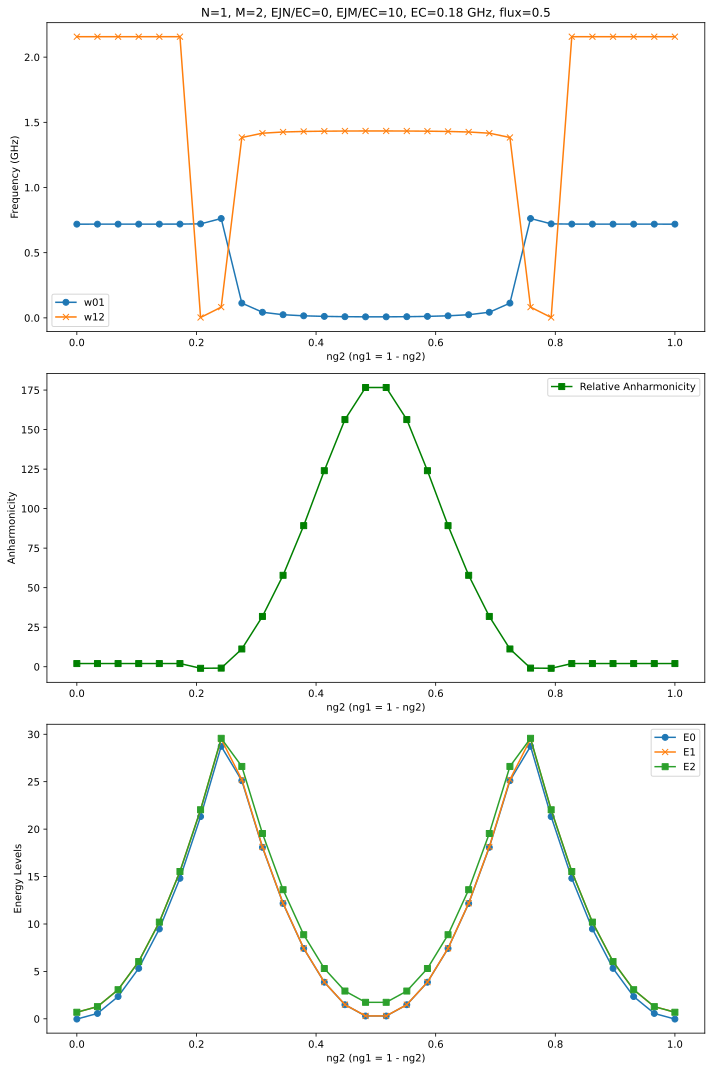

In [10]:
import numpy as np
import matplotlib.pyplot as plt

ng1_list = np.linspace(0, 1, N_ng1)
ng2_list = np.linspace(0, 1, N_ng2)

# Indices along the line ng1 + ng2 = 1
line_indices = [(i, N_ng2 - 1 - i) for i in range(min(N_ng1, N_ng2))]

for k, flux_value in enumerate(flux_list):
    # Extract values along the line ng1 + ng2 = 1
    w01_line = [w01_list[i, j, k] for i, j in line_indices]
    w12_line = [w12_list[i, j, k] for i, j in line_indices]
    anharmonicity_line = [relative_anharm_list[i, j, k] for i, j in line_indices]
    E0_line = [E0_list[i, j, k] for i, j in line_indices]
    E1_line = [E1_list[i, j, k] for i, j in line_indices]
    E2_line = [E2_list[i, j, k] for i, j in line_indices]
    ng2_line = ng2_list[:len(line_indices)]  # Corresponding ng2 values along the line

    # Plotting the data
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Canvas 1: w01 and w12
    axes[0].plot(ng2_line, w01_line, label="w01", marker="o")
    axes[0].plot(ng2_line, w12_line, label="w12", marker="x")
    axes[0].set_title("N={}, M={}, EJN/EC={}, EJM/EC={}, EC={} GHz, flux={}".format(nmon.N, nmon.M, int(nmon.EJN/nmon.EC_shunt), int(nmon.EJM/nmon.EC_shunt),
                                                                            round(nmon.EC_shunt, 2), flux_value))
    axes[0].set_xlabel("ng2 (ng1 = 1 - ng2)")
    axes[0].set_ylabel("Frequency (GHz)")
    axes[0].legend()

    # Canvas 2: Anharmonicity
    axes[1].plot(ng2_line, anharmonicity_line, label="Relative Anharmonicity", color="green", marker="s")
    # axes[1].set_title("Anharmonicity along ng1 + ng2 = 1 (flux={})".format(flux_value))
    axes[1].set_xlabel("ng2 (ng1 = 1 - ng2)")
    axes[1].set_ylabel("Anharmonicity")
    axes[1].legend()

    # Canvas 3: E0, E1, and E2
    axes[2].plot(ng2_line, E0_line, label="E0", marker="o")
    axes[2].plot(ng2_line, E1_line, label="E1", marker="x")
    axes[2].plot(ng2_line, E2_line, label="E2", marker="s")
    # axes[2].set_title("E0, E1, E2 along ng1 + ng2 = 1 (flux={})".format(flux_value))
    axes[2].set_xlabel("ng2 (ng1 = 1 - ng2)")
    axes[2].set_ylabel("Energy Levels")
    axes[2].legend()

    # Save the plot for this flux value
    plt.tight_layout()
    plt.savefig("./data_arrays_ng/line_plot_flux_{}.pdf".format(flux_value))
    plt.show()


In [11]:
s = nmon.nmon_circ.sym_hamiltonian(float_round=6)
s, nmon.N, nmon.M, nmon.EJM, nmon.EJN

<IPython.core.display.Latex object>

(None, 1, 2, 1.7999999999999998, 0.018)

In [12]:
C_matr = nmon.nmon_circ.symbolic_circuit._capacitance_matrix()
C_matr, np.linalg.inv(C_matr)

(array([[ 0.69646444, -0.002     ],
        [-0.002     ,  0.004     ]]),
 array([[  1.43788803,   0.71894402],
        [  0.71894402, 250.35947201]]))

In [13]:
nmon.nmon_circ.offset_charge_transformation()

<IPython.core.display.Latex object>

In [14]:
nmon.nmon_circ.variable_transformation()

<IPython.core.display.Latex object>

In [15]:
Matr = nmon.nmon_circ.transformation_matrix

M_inv  = np.linalg.inv(Matr)

Matr, M_inv

(array([[1, 1],
        [1, 0]]),
 array([[ 0.,  1.],
        [ 1., -1.]]))

In [16]:
EC_old_basis = M_inv.T @ np.linalg.inv(C_matr) @ M_inv
EC_old_basis

array([[ 250.35947201, -249.64052799],
       [-249.64052799,  250.35947201]])

In [17]:
import sympy as sp

# Define the symbols for the charge operators and gate-induced charges
n1, n2 = sp.symbols('n1 n2', commutative=False)  # Charge operators (non-commutative if necessary)
ng1, ng2 = sp.symbols('ng1 ng2')  # Gate-induced charges

# Assume EC_new is a 2x2 matrix, define it symbolically
# EC11, EC12, EC21, EC22 = sp.symbols('EC11 EC12 EC21 EC22')
# EC_new = sp.Matrix([[EC11, EC12], [EC21, EC22]])
EC_new = EC_old_basis

# Define the charge operator vectors (add ng to each)
n_vector = sp.Matrix([n1 + ng1, n2 + ng2])

# Construct the Hamiltonian using matrix multiplication for the charging energy terms
H_C = n_vector.T * EC_new * n_vector

# Simplify the expression to make it more readable
H_C_simplified = sp.simplify(H_C[0])  # Access the first element as it results in a 1x1 matrix

# Display the Hamiltonian
H_C_simplified


(250.359472007515*(ng1 + n1) - 249.640527992485*(ng2 + n2))*(ng1 + n1) + (250.359472007515*(ng2 + n2) - 249.640527992485*(ng1 + n1))*(ng2 + n2)

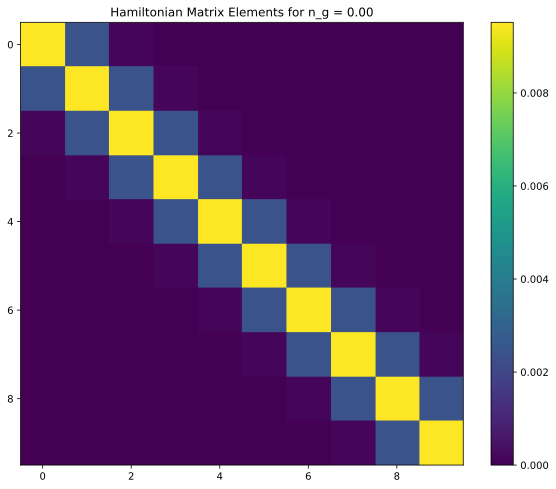

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
E_C = 0.06  # Example value for Charging Energy matrix
E_JN = 4.5  # Josephson Energy
E_JM = 0.9
N = 1  # Number of JJs in the first branch
M = 2  # Number of JJs in the second branch
n_max = 10  # Range of charge states

# Discretization of the phase variable
N_phi = 100
N_phi_trunc = 10
phi = np.linspace(0, 2 * np.pi, N_phi, endpoint=False)

N_ng = 100
# Define charge states and gate charges
n_g_values = np.linspace(-0.1, 0.1, N_ng)

# Define EC as a random symmetric matrix (for demonstration)
# E_C_matrix = np.random.rand(N+M-1, N+M-1)
# E_C_matrix = (E_C_matrix + E_C_matrix.T) / 2  # Ensure it is symmetric

E_C_matrix = EC_old_basis # E_C*np.array([[0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1]])

# Function to create derivative operator with scaled phase variable
def create_derivative_operator(scaling_factor):
    h_phi_scaled = 2 * np.pi / (N_phi) * scaling_factor
    d_dphi_scaled = -1j * (np.diag(np.ones(N_phi - 1), 1) - np.diag(np.ones(N_phi - 1), -1)) / (2 * h_phi_scaled)
    d_dphi_scaled[0, -1] = -1j / (2 * h_phi_scaled)  # Periodic boundary condition
    d_dphi_scaled[-1, 0] = 1j / (2 * h_phi_scaled)
    return d_dphi_scaled

# Create derivative operators for N and M scaling
d_dphi_N = create_derivative_operator(N)
d_dphi_M = create_derivative_operator(M)

# Initialize the Hamiltonian array for each gate charge
H_matrices = np.zeros((N_phi, N_phi, len(n_g_values)), dtype=complex)

num_n_g = 0

# Construct the Hamiltonian iteratively for each gate charge
for idx, n_g in enumerate(n_g_values):
    H_kinetic = np.zeros((N_phi, N_phi), dtype=complex)
    for i in range(N + M - 1):
        for j in range(N + M - 1):
            n_operator_i = d_dphi_N if i < N else d_dphi_M  # Choose the correct scaled operator
            n_operator_j = d_dphi_N if j < N else d_dphi_M
            H_kinetic += 4*E_C_matrix[i, j] * (n_operator_i/1e4 - n_g *(i == num_n_g) * np.eye(N_phi)).conj().T @ (n_operator_j/1e4 - n_g * (j == num_n_g)* np.eye(N_phi))

    # Josephson terms with scaled cosine and sine matrices
    phi = np.linspace(0, 2 * np.pi, N_phi, endpoint=False)
    cos_phi_N = np.diag(np.cos(N * phi))
    cos_phi_M = np.diag(np.cos(M * phi))
    H_Josephson = 0*( -M * E_JM * cos_phi_N - N * E_JN * cos_phi_M)
    
    # Total Hamiltonian for this gate charge
    H_matrices[:, :, idx] = H_kinetic + H_Josephson

# print(H_matrices[:, :, N_ng//2+1])
# Numerically differentiate the Hamiltonian with respect to n_g
dH_dng = np.gradient(H_matrices, n_g_values, axis=2)

# Select the derivative at the central n_g value
dH_dng_at_ng0 = dH_dng[:N_phi_trunc, :N_phi_trunc, N_ng//2]  # assuming n_g0 corresponds to the middle index

matrix_elements = H_matrices[:N_phi_trunc, :N_phi_trunc, N_ng//2+1]
# print(matrix_elements)
# Example visualization for a selected gate charge
selected_idx = len(n_g_values) // 2
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(matrix_elements), cmap='viridis')
plt.colorbar()
plt.title(f'Hamiltonian Matrix Elements for n_g = {n_g_values[selected_idx]:.2f}')
# plt.xlabel('Phase (radians)')
# plt.ylabel('Charge State')
plt.show()
